<a href="https://colab.research.google.com/github/JERWIN0/BAT404_FIREMAN/blob/main/Analysis_of_Wildfires_Occurrence_Worldwide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
from google.colab import files
import io
from datetime import timedelta
import matplotlib.pyplot as plt
from google.colab import data_table
from datetime import datetime , timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

In [14]:
url = 'https://raw.githubusercontent.com/JERWIN0/BAT404_FIREMAN/main/California_Fire_Incidents.csv'

In [15]:
ds = pd.read_csv(url)

In [16]:
ds.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim/fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",17/08/2013,Finalized,NaN,NaN,NaN,NaN,5fb18d4d/213f/4d83/a179/daaf11939e78,2013/09/06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse/fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",30/05/2013,Finalized,NaN,NaN,NaN,NaN,bf37805e/1cc2/4208/9972/753e47874c87,2013/06/08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain/fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",15/07/2013,Finalized,NaN,NaN,NaN,NaN,a3149fec/4d48/427c/8b2c/59e8b79d59db,2013/07/30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american/fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",10/08/2013,Finalized,NaN,NaN,NaN,NaN,8213f5c7/34fa/403b/a4bc/da2ace6e6625,2013/08/30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs/fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",02/05/2013,Finalized,6.0,10.0,NaN,NaN,46731fb8/3350/4920/bdf7/910ac0eb715c,2013/05/11T06:30:00Z,11.0


In [17]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AcresBurned           1633 non-null   float64
 1   Active                1636 non-null   bool   
 2   AdminUnit             1636 non-null   object 
 3   AirTankers            28 non-null     float64
 4   ArchiveYear           1636 non-null   int64  
 5   CalFireIncident       1636 non-null   bool   
 6   CanonicalUrl          1636 non-null   object 
 7   ConditionStatement    284 non-null    object 
 8   ControlStatement      111 non-null    object 
 9   Counties              1636 non-null   object 
 10  CountyIds             1636 non-null   object 
 11  CrewsInvolved         171 non-null    float64
 12  Dozers                123 non-null    float64
 13  Engines               191 non-null    float64
 14  Extinguished          1577 non-null   object 
 15  Fatalities           

data cleaning

In [18]:
ds.drop(['ConditionStatement'], axis =1, inplace = True)
ds.drop(['ControlStatement'], axis =1, inplace = True)
ds.drop(['StructuresEvacuated'], axis =1, inplace = True)
ds.drop(['StructuresThreatened'], axis =1, inplace = True)
ds.drop(['UniqueId'], axis =1, inplace = True)
ds.drop(['Updated'], axis =1, inplace = True)
ds.drop(['Active'], axis =1, inplace = True)
ds.drop(['AirTankers'], axis =1, inplace = True)
ds.drop(['CanonicalUrl'], axis =1, inplace = True)
ds.drop(['SearchDescription'], axis =1, inplace = True)
ds.drop(['SearchKeywords'], axis =1, inplace = True)
ds.drop(['Name'], axis =1, inplace = True)
ds.drop(['CountyIds'], axis =1, inplace = True)
ds.drop(['Status'], axis =1, inplace = True)
ds.drop(['Location'], axis =1, inplace = True)
ds.drop(['Latitude'], axis =1, inplace = True)
ds.drop(['Engines'], axis =1, inplace = True)
ds.drop(['Dozers'], axis =1, inplace = True)
ds.drop(['CrewsInvolved'], axis =1, inplace = True)
ds.drop(['Longitude'], axis =1, inplace = True)
ds.drop(['Helicopters'], axis =1, inplace = True)
ds.drop(['Public'], axis =1, inplace = True)


ds.head (1635)

,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,Extinguished,Fatalities,Featured,Final,FuelType,Injuries,MajorIncident,PercentContained,PersonnelInvolved,Started,StructuresDamaged,StructuresDestroyed,WaterTenders
0,257314.0,Stanislaus National Forest/Yosemite National Park,2013,True,Tuolumne,06/09/2013,NaN,False,True,NaN,NaN,False,100.0,NaN,17/08/2013,NaN,NaN,NaN
1,30274.0,USFS Angeles National Forest/Los Angeles Count...,2013,True,Los Angeles,08/06/2013,NaN,False,True,NaN,NaN,False,100.0,NaN,30/05/2013,NaN,NaN,NaN
2,27531.0,CAL FIRE Riverside Unit / San Bernardino Natio...,2013,True,Riverside,30/07/2013,NaN,False,True,NaN,NaN,False,100.0,NaN,15/07/2013,NaN,NaN,NaN
3,27440.0,Tahoe National Forest,2013,False,Placer,30/08/2013,NaN,False,True,NaN,NaN,False,100.0,NaN,10/08/2013,NaN,NaN,NaN
4,24251.0,Ventura County Fire/CAL FIRE,2013,True,Ventura,11/05/2013,NaN,False,True,NaN,10.0,True,100.0,2167.0,02/05/2013,6.0,10.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,10.0,CAL FIRE / Butte County Fire,2019,True,Butte,08/05/2019,NaN,False,True,NaN,NaN,False,100.0,NaN,30/04/2019,NaN,NaN,NaN
1631,9.0,CAL FIRE / Riverside County Fire,2019,True,Riverside,10/10/2019,NaN,False,True,NaN,NaN,False,100.0,NaN,10/10/2019,NaN,NaN,NaN
1632,2.0,CAL FIRE Nevada/Yuba/Placer Unit,2019,True,Nevada,28/06/2019,NaN,False,True,NaN,NaN,False,100.0,NaN,28/06/2019,NaN,NaN,NaN
1633,NaN,Yolo County Fire Protection District,2019,False,Yolo,NaN,NaN,False,True,NaN,NaN,False,NaN,NaN,25/11/2019,NaN,NaN,NaN


In [19]:
ds.info()
ds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AcresBurned          1633 non-null   float64
 1   AdminUnit            1636 non-null   object 
 2   ArchiveYear          1636 non-null   int64  
 3   CalFireIncident      1636 non-null   bool   
 4   Counties             1636 non-null   object 
 5   Extinguished         1577 non-null   object 
 6   Fatalities           21 non-null     float64
 7   Featured             1636 non-null   bool   
 8   Final                1636 non-null   bool   
 9   FuelType             12 non-null     object 
 10  Injuries             120 non-null    float64
 11  MajorIncident        1636 non-null   bool   
 12  PercentContained     1633 non-null   float64
 13  PersonnelInvolved    204 non-null    float64
 14  Started              1636 non-null   object 
 15  StructuresDamaged    67 non-null     f

,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,Extinguished,Fatalities,Featured,Final,FuelType,Injuries,MajorIncident,PercentContained,PersonnelInvolved,Started,StructuresDamaged,StructuresDestroyed,WaterTenders
0,257314.0,Stanislaus National Forest/Yosemite National Park,2013,True,Tuolumne,06/09/2013,NaN,False,True,NaN,NaN,False,100.0,NaN,17/08/2013,NaN,NaN,NaN
1,30274.0,USFS Angeles National Forest/Los Angeles Count...,2013,True,Los Angeles,08/06/2013,NaN,False,True,NaN,NaN,False,100.0,NaN,30/05/2013,NaN,NaN,NaN
2,27531.0,CAL FIRE Riverside Unit / San Bernardino Natio...,2013,True,Riverside,30/07/2013,NaN,False,True,NaN,NaN,False,100.0,NaN,15/07/2013,NaN,NaN,NaN
3,27440.0,Tahoe National Forest,2013,False,Placer,30/08/2013,NaN,False,True,NaN,NaN,False,100.0,NaN,10/08/2013,NaN,NaN,NaN
4,24251.0,Ventura County Fire/CAL FIRE,2013,True,Ventura,11/05/2013,NaN,False,True,NaN,10.0,True,100.0,2167.0,02/05/2013,6.0,10.0,11.0


In [20]:
ds.columns

Index(['AcresBurned', 'AdminUnit', 'ArchiveYear', 'CalFireIncident',
       'Counties', 'Extinguished', 'Fatalities', 'Featured', 'Final',
       'FuelType', 'Injuries', 'MajorIncident', 'PercentContained',
       'PersonnelInvolved', 'Started', 'StructuresDamaged',
       'StructuresDestroyed', 'WaterTenders'],
      dtype='object')

In [21]:
ds.Extinguished = pd.to_datetime (ds.Extinguished)
ds.Started= pd.to_datetime (ds.Started)


ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   AcresBurned          1633 non-null   float64       
 1   AdminUnit            1636 non-null   object        
 2   ArchiveYear          1636 non-null   int64         
 3   CalFireIncident      1636 non-null   bool          
 4   Counties             1636 non-null   object        
 5   Extinguished         1577 non-null   datetime64[ns]
 6   Fatalities           21 non-null     float64       
 7   Featured             1636 non-null   bool          
 8   Final                1636 non-null   bool          
 9   FuelType             12 non-null     object        
 10  Injuries             120 non-null    float64       
 11  MajorIncident        1636 non-null   bool          
 12  PercentContained     1633 non-null   float64       
 13  PersonnelInvolved    204 non-null

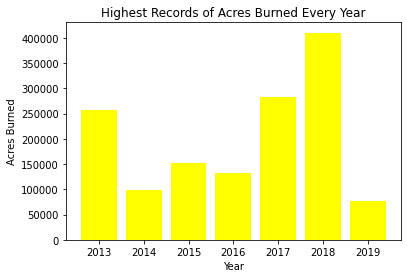

In [39]:
plt.bar(ds.ArchiveYear, ds.AcresBurned,color= 'yellow')

plt.title('Highest Records of Acres Burned Every Year')
plt.xlabel('Year')
plt.ylabel('Acres Burned')
plt.show()

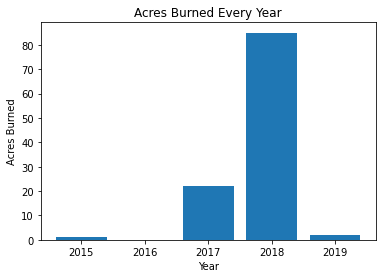

In [23]:

plt.bar(ds.ArchiveYear,ds.Fatalities)

plt.title('Acres Burned Every Year')
plt.xlabel('Year')
plt.ylabel('Acres Burned')
plt.show()

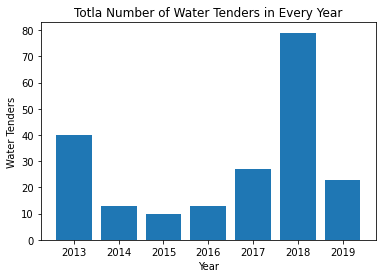

In [24]:
plt.bar(ds.ArchiveYear,ds.WaterTenders)


plt.title('Totla Number of Water Tenders in Every Year')
plt.xlabel('Year')
plt.ylabel('Water Tenders')
plt.show()

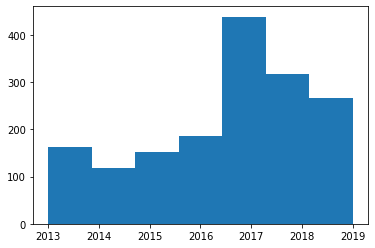

In [40]:

plt.hist(ds.ArchiveYear,bins=7,linewidth=0.5)
plt.show()

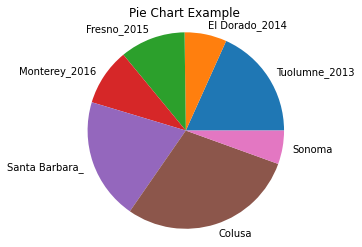

In [26]:
labels = 'Tuolumne_2013', 'El Dorado_2014', 'Fresno_2015', 'Monterey_2016','Santa Barbara_','Colusa','Sonoma'
sections = [257314, 97717, 151623,132127,281893,410203,77758]


plt.pie(sections, labels=labels )

plt.axis('equal') # Try commenting this out.
plt.title('Countries with Highest Record of Acres Burned')
plt.show()
